# Applying Data Science Techniques to New Zealand's 2018 Census Data

## Languages spoken

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
# import csv data on number of speakers of various languages
address = "languages-spoken-total-responses-2018-census-csv.csv"
df = pd.read_csv(address)
df.columns = ['Code',  'Language', 'Number of speakers']
df = df.sort_values(by=("Number of speakers"), ascending=False)
df = df.drop([197, 198, 196])
df.head(10)

,Code,Language,Number of speakers
3,01112,English,4482135
108,16110,Māori,185955
109,16111,Samoan,101937
190,66666,None (eg too young to talk),101751
88,13113,Northern Chinese,95253
43,07110,Hindi,69471
16,02110,French,55116
85,13110,Yue,52767
84,13100,Sinitic not further defined,51501
132,17115,Tagalog,43278


In [4]:
# Take only the top 10 languages spoken in NZ
df_top10 = df.head(10)
df_top10.head(df_top10.size)

,Code,Language,Number of speakers
3,01112,English,4482135
108,16110,Māori,185955
109,16111,Samoan,101937
190,66666,None (eg too young to talk),101751
88,13113,Northern Chinese,95253
43,07110,Hindi,69471
16,02110,French,55116
85,13110,Yue,52767
84,13100,Sinitic not further defined,51501
132,17115,Tagalog,43278


In [6]:
# Extract language names and reset indexing
languages = df_top10['Language']
languages.reset_index(drop=True, inplace=True)
print(languages)


0                        English
1                          Māori
2                         Samoan
3    None (eg too young to talk)
4               Northern Chinese
5                          Hindi
6                         French
7                            Yue
8    Sinitic not further defined
9                        Tagalog
Name: Language, dtype: object


In [9]:
# Extract number of speakers and reset indexing
num_speakers = df_top10['Number of speakers']
num_speakers.reset_index(drop=True, inplace=True)
print(num_speakers)

0    4482135
1     185955
2     101937
3     101751
4      95253
5      69471
6      55116
7      52767
8      51501
9      43278
Name: Number of speakers, dtype: int64


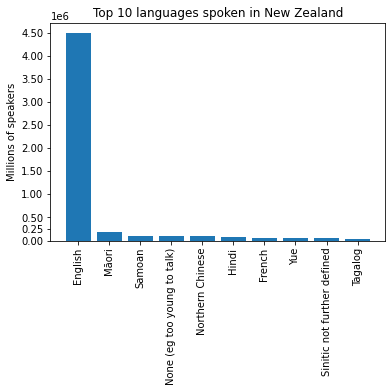

In [24]:
plt.bar(languages, num_speakers)
plt.title('Top 10 languages spoken in New Zealand')
plt.ylabel('Millions of speakers')
plt.yticks([0, 0.25e6, 0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6, 4e6, 4.5e6])
plt.xticks(rotation=90)
plt.show()


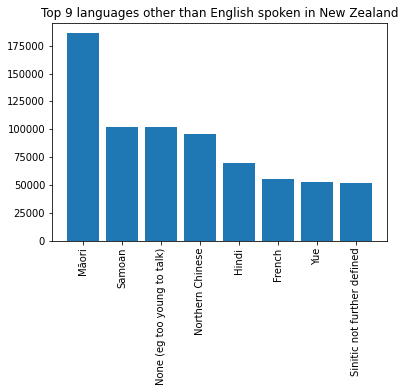

In [28]:
# Note that it is difficult to see ranges of languages other than English, so lets plot them seperately
languages2 = languages[1:9]
num_speakers2 = num_speakers[1:9]

plt.bar(languages2, num_speakers2)
plt.title('Top 9 languages other than English spoken in New Zealand')
plt.xticks(rotation=90)
plt.show()

## Smoking Status

In [54]:
df_smoking = pd.read_csv("cigarette-smoking-behaviour-2018-census-csv.csv")
df_smoking.columns = ['Code', 'Smoking_Status', 'Population']
df_smoking.head(df_smoking.size)

,Code,Smoking_Status,Population
0,1,Regular smoker,498996
1,2,Ex-smoker,832104
2,3,Never smoked regularly,2445252
3,7,Response unidentifiable,0
4,9,Not stated,0
5,TotalStated,Total stated,3776355
6,Total,Total,3776355


In [81]:
# Drop some values so we only plot relevant data points
df_smoking  = df_smoking.drop([3, 4,5,6])


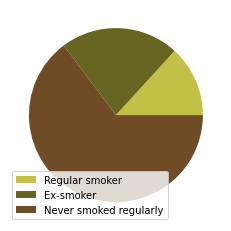

In [84]:
# Pie chart
smokers_class = df_smoking.Smoking_Status
num_smokers = df_smoking.Population
color_theme = ['#C2C047', '#676522', '#6F4C25']
plt.pie(num_smokers, colors=color_theme)
plt.legend(smokers_class)
plt.show()